## Basics of EzGM
Created on: 26/08/2021

Updated on: 06/07/2023

Author: Volkan Ozsarac

Affiliation: EUCENTRE, European Centre for Training and Research in Earthquake Engineering

PhD, Seismic Risk Specialist, Structural Engineer

email:  ozsarac.volkan@eucentre.it

## Package installation on Google Colaboratory

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory to the location of notebook
%cd /content/drive/My Drive/Colab Notebooks/EzGM/notebooks
# Install EzGM
!pip install --upgrade pip
!pip install git+https://github.com/volkanozsarac/EzGM.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/EzGM/notebooks
  Cloning https://github.com/volkanozsarac/EzGM.git to /tmp/pip-req-build-ayaa2q58
  Running command git clone --filter=blob:none --quiet https://github.com/volkanozsarac/EzGM.git /tmp/pip-req-build-ayaa2q58
  Resolved https://github.com/volkanozsarac/EzGM.git to commit c33ab0325a3bea1535681f8b52710384403fbd1d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Package contents
In order to understand what the contents of the package are, the user can use help(package name). EzGM has three different package contents.

In [ ]:
import EzGM
help(EzGM)

Help on package EzGM:

NAME
    EzGM

PACKAGE CONTENTS
    selection
    signal
    utility
    webdriverdownloader

FILE
    /usr/local/lib/python3.10/dist-packages/EzGM/__init__.py




## Description of the package contents
The package contents can be understood by making use of help(content). This will show what functions are inside the package.

### Description of the functions
Similarly, the description of a single function can be understood by making use of help(function). This will show the details of the function, description of the input parameters etc.

### Navigationg through folders
1. Navigation through the folders is possible in google-colab, and it is necessary in order to see and save output files to google drive or download them. First, open the notebook with Google Colaboratory.
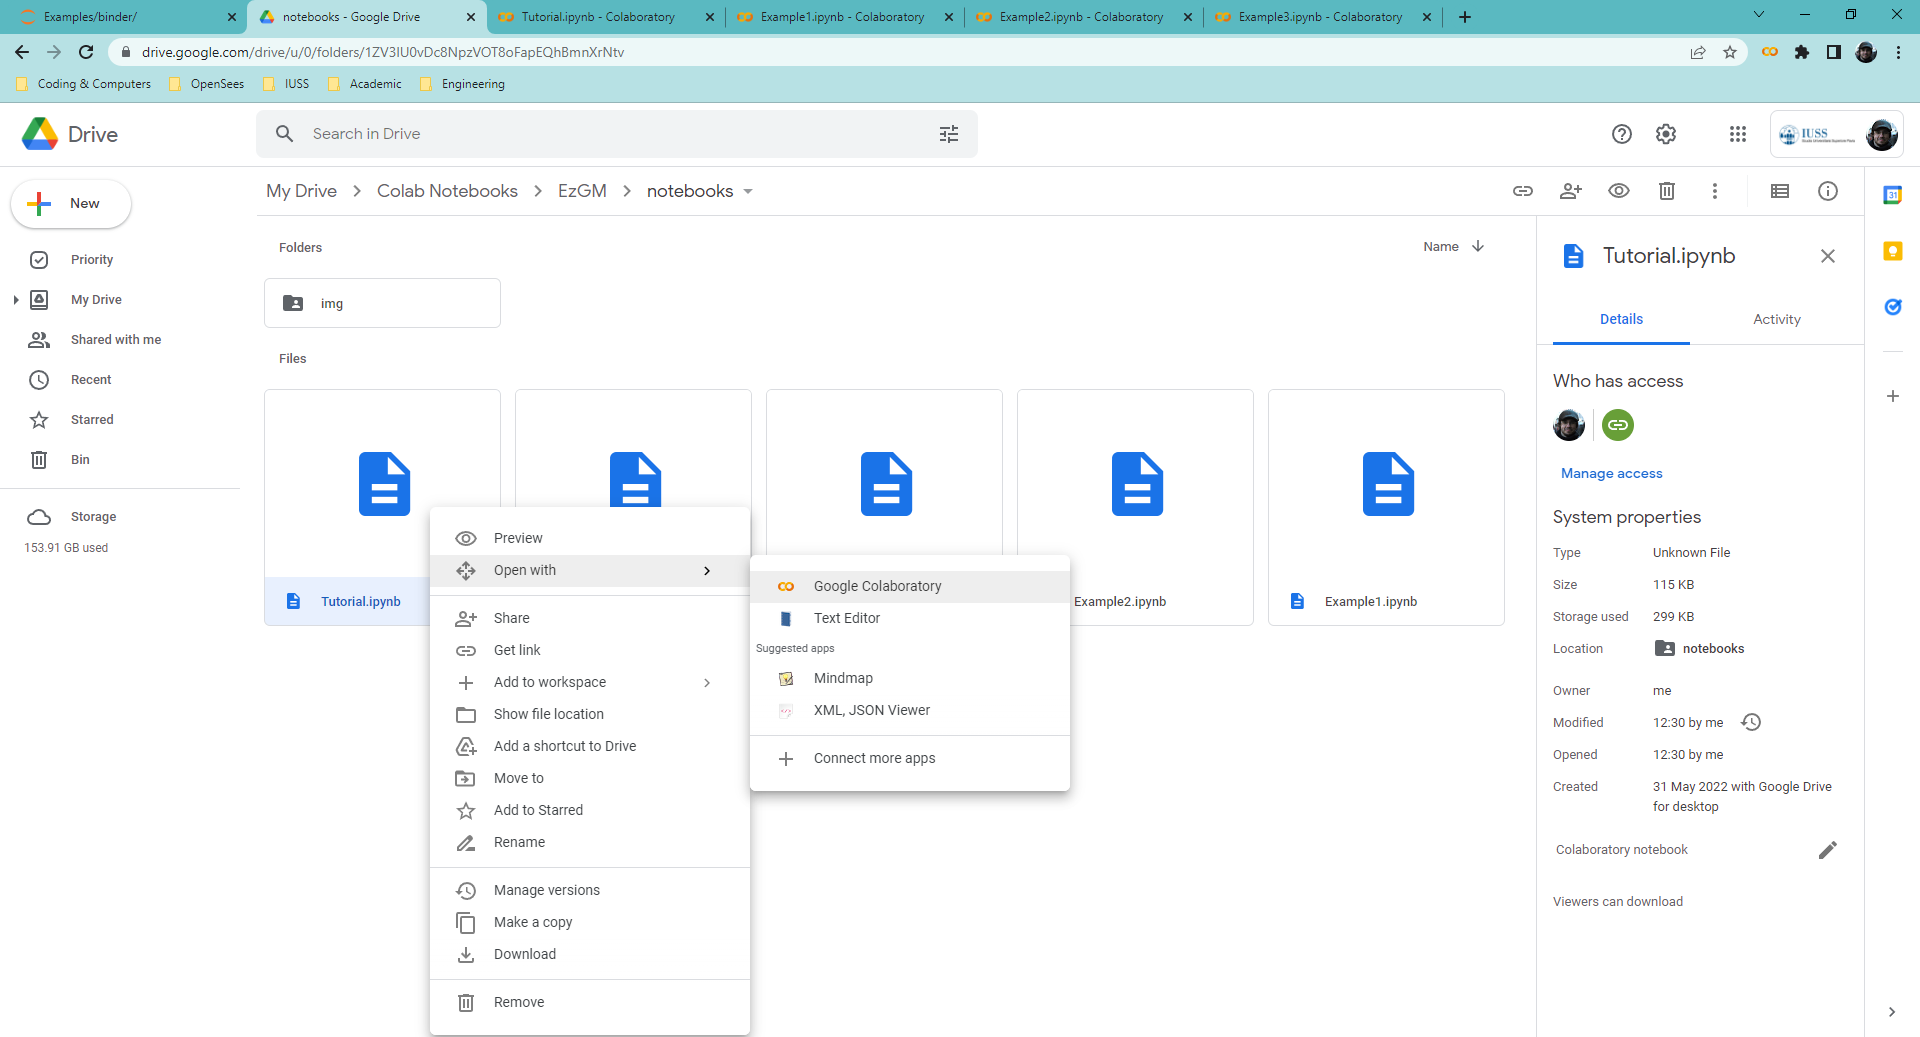
2. If the Google drive is not mounted. Then click on <font color='red'>Mount Drive</font>, then navigate to the google drive directory where your notebook is located.
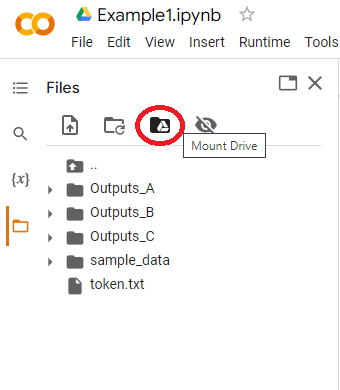
3. The output directory is defined by the user. If the user defined the name of output directory as <font color='red'>Outputs</font> all the information can be found within this folder:
    - Targeted spectrum: Targeted.pdf
    - Simulated and Targeted spectra: Simulated.pdf
    - Spectra of selected records and targeted spectrum: Selected.pdf
    - Dictionary which contains selection information: obj.pkl
    - Raw time histories: unscaled_records_2023_7_6_19_5_48_3_238_0.zip (unscaled_records_date_.zip)
    - Scaled and formatted time histories (in g): RSN1198_CHICHI_CHY029-E_ACC.txt (RecordName_SignalType.txt)
    - Scaled time history file names: GMR_names.txt (for selection in two horizontal directions these would be GMR_H1_names.txt   and GMR_H2_names.txt)
    - Time step of the selected time histories: GMR_dts.txt
    - Scale factors used for each record: GMR_sf_used.txt

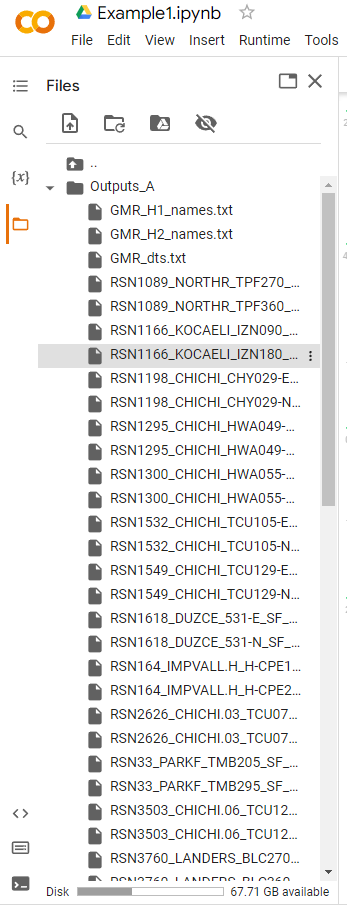

## 1) EzGM.selection
EzGM.selection has two subclasses which requires initialization:
- ConditionalSpectrum: performs conditional spectrum based selection
- CodeSpectrum: performs building code based selection (TBEC 2018, ASCE 7-16, EC8 - Part 1)

Whichever selection option we use: we first create the associated object
- obj = EzGM.selection.ConditionalSpectrum(...)
- obj = EzGM.selection.CodeSpectrum(...)

### 1a) EzGM.selection.ConditionalSpectrum

In [ ]:
help(EzGM.selection.ConditionalSpectrum.__init__) # obj = EzGM.Selection.ConditionalSpectrum(...)

Help on function __init__ in module EzGM.selection:

__init__(self, database='NGA_W2', output_directory='Outputs', obj_path=None)
    Details
    -------
    Loads the database and add spectral values for Tstar 
    if they are not present via interpolation.
    
    Parameters
    ----------
    database : str, optional
        Database to use: NGA_W2, ESM_2018
        The default is NGA_W2.
    output_directory : str, optional.
        output directory to create.
        The default is 'Outputs'
    obj_path : str, optional
        This is the path to the previously saved obj.pkl file by EzGM.
        One can use the previously saved instance and use rest of the methods.
        The default is None.
    
    Returns
    -------
    None.



In [ ]:
help(EzGM.selection.ConditionalSpectrum.create) # obj.create(...)

Help on function create in module EzGM.selection:

create(self, Tstar=None, gmpe='BooreEtAl2014', num_components=1, spectrum_definition='RotD50', site_param={'vs30': 520}, rup_param={'rake': [0.0, 45.0], 'mag': [7.2, 6.5]}, dist_param={'rjb': [20, 5]}, hz_cont=[0.6, 0.4], period_range=[0.01, 4], im_Tstar=1.0, epsilon=None, use_variance=1, correlation_model='baker_jayaram')
    Details
    -------
    Creates the target spectrum (conditional or unconditional).
    
    Notes
    -----
    See https://docs.openquake.org/oq-engine/master/openquake.hazardlib.gsim.html
    in order to check required input parameters for the ground motion models.
    e.g. rupture parameters (rup_param), site parameters (site_param), distance parameters (dist_param).
    Rupture parameters 'fhw', 'azimuth', 'upper_sd' and 'lower_sd' are used to derive some gmm parameters
    in accordance with Kaklamanos et al. 2011 within ConditionalSpectrum._set_contexts method. They are not
    required by any gmm.
    
  

In [ ]:
help(EzGM.selection.ConditionalSpectrum.select) # obj.select(...)

Help on function select in module EzGM.selection:

select(self, num_records=30, is_scaled=1, max_scale_factor=4, mag_limits=None, vs30_limits=None, rjb_limits=None, mech_limits=None, num_simulations=20, seed_value=None, error_weights=[1, 2, 0.3], num_greedy_loops=2, penalty=0, tolerance=10)
    Details
    -------
    Perform the ground motion selection.
    
    References
    ----------
    Jayaram, N., Lin, T., and Baker, J. W. (2011). 
    A computationally efficient ground-motion selection algorithm for 
    matching a target response spectrum mean and variance.
    Earthquake Spectra, 27(3), 797-815.
    
    Parameters
    ----------
    num_records : int, optional
        Number of ground motions to be selected.
        The default is 30.
    max_scale_factor : float, optional
        The maximum allowable scale factor
        If None use of amplitude scaling for spectral matching is not allowed.
        If other than None use of amplitude scaling for spectral matching is allow

In [ ]:
help(EzGM.selection.ConditionalSpectrum.download) # obj.download(...)

Help on function download in module EzGM.selection:

download(self, username=None, password=None, token_path=None, sleeptime=2, browser='chrome')
    Details
    -------
    This function has been created as a web automation tool in order to
    download unscaled record time histories from either
    NGA-West2 (https://ngawest2.berkeley.edu/) or ESM databases (https://esm-db.eu/).
    
    Notes
    -----
    Either of google-chrome or mozilla-firefox should have been installed priorly to download from NGA-West2.
    
    Parameters
    ----------
    username : str
        Account username (e-mail),  e.g. 'example_username@email.com'.
    password : str
        Account password, e.g. 'example_password123456'.
    sleeptime : int, optional
        Time (sec) spent between each browser operation. This can be increased or decreased depending on the internet speed.
        Used in the case of database='NGA_W2'
        The default is 2
    browser : str, optional
        The browser to use

In [ ]:
help(EzGM.selection.ConditionalSpectrum.write) # obj.write(...)

Help on function write in module EzGM.selection:

write(self, object=0, records=1, record_type='acc', zip_parent_path='')
    Details
    -------
    Writes the object as pickle, selected and scaled records as .txt files.
    
    Parameters
    ----------
    object : int, optional
        flag to write the object into the pickle file.
        The default is 0.
    records : int, optional
        flag to write the selected and scaled time histories
        time-steps, filenames, scaling factors.
        The default is 1.
    record_type : str, optional
        option to choose the type of time history to be written.
        'acc' : for the acceleration series, units: g
        'vel' : for the velocity series, units: g * sec
        'disp': for the displacement series: units: g * sec2
    zip_parent_path : str, optional
        This is option could be used if the user already has all the
        records in database. This is the folder path which contains
        "database.zip" file (e.

In [ ]:
help(EzGM.selection.ConditionalSpectrum.plot) # obj.plot(...)

Help on function plot in module EzGM.selection:

plot(self, target=0, simulations=0, records=1, save=0, show=1)
    Details
    -------
    Plots the spectra of selected and simulated records,
    and/or target spectrum.
    
    Parameters
    ----------
    target : int, optional for ConditionalSpectrum
        Flag to plot target spectrum.
        The default is 1.
    simulations : int, optional for ConditionalSpectrum
        Flag to plot simulated response spectra vs. target spectrum.
        The default is 0.
    records : int, optional for ConditionalSpectrum
        Flag to plot Selected response spectra of selected records
        vs. target spectrum.
        The default is 1.
    save : int, optional for all selection options
        Flag to save plotted figures in pdf format.
        The default is 0.
    show : int, optional for all selection options
        Flag to show figures
        The default is 0.
    
    Notes
    -----
    0: no, 1: yes
    
    Returns
    -----

### 1b) EzGM.selection.CodeSpectrum

In [ ]:
help(EzGM.selection.CodeSpectrum.__init__)  # obj = EzGM.selection.CodeSpectrum(...)

Help on function __init__ in module EzGM.selection:

__init__(self, database='NGA_W2', output_directory='Outputs', target_path=None, num_records=11, num_components=1, selection_algorithm=1, mag_limits=None, vs30_limits=None, rjb_limits=None, mech_limits=None, max_scale_factor=2, max_rec_per_event=3, obj_path=None)
    Details
    -------
    Loads the record database to use, creates output folder, sets selection criteria.
    
    Parameters
    ----------
    database : str, optional
        Database to use: NGA_W2, ESM_2018
        The default is NGA_W2.
    output_directory : str, optional
        Output directory
        The default is 'Outputs'
    target_path : str, optional, the default is None.
        Path for used defined target spectrum.
    num_records : int, optional, the default is 11.
        Number of records to be selected. 
    num_components : int, optional, the default is 1.
        Number of ground motion components to select.
    selection_algorithm : int, optiona

In [ ]:
help(EzGM.selection.CodeSpectrum.select_tbec2018)  # obj.tbec2018(...)

Help on function select_tbec2018 in module EzGM.selection:

select_tbec2018(self, lat=41.0582, long=29.00951, dd_level=2, site_class='ZC', predominant_period=1)
    Details
    -------
    Selects the suitable ground motion set in accordance with TBEC 2018. 
    If user did not define any target spectrum, the design spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    Rule 1: Mean of selected records should remain above the lower bound target spectra.
        For num_components = 1: Sa_rec = (Sa_1 or Sa_2) - lower bound = 1.0 * SaTarget(0.2Tp-1.5Tp) 
        For num_components = 2: Sa_rec = (Sa_1**2+Sa_2**2)**0.5 - lower bound = 1.3 * SaTarget(0.2Tp-1.5Tp) 
    
    Rule 2: 
        No more than 3 records can be selected from the same event! In other words,
        rec_eq_id cannot be the same for more than 3 of the 

In [ ]:
help(EzGM.selection.CodeSpectrum.select_asce7_16)  # obj.asce7_16(...)

Help on function select_asce7_16 in module EzGM.selection:

select_asce7_16(self, lat=34, long=-118, risk_cat='II', site_class='C', fundamental_periods=[1, 1], lower_bound_period=None, upper_bound_period=None)
    Details
    -------
    Selects the suitable ground motion set in accordance with ASCE 7-16. 
    If user did not define any target spectrum, the MCE_R response spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters.
    
    
    References
    ----------
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria 
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    Rule 1: Mean of selected records should remain above the lower bound target spectra.
        For num_components = 1: Sa_rec = (Sa1 or Sa2) - lower bound = 0.9 * Sa_MCEr(Tlower-Tupper)
        For num_components = 2: Sa_rec = RotD100 - lower bound = 0.9 * Sa_MCEr(Tlowe

In [ ]:
help(EzGM.selection.CodeSpectrum.select_ec8_part1)  # obj.ec8_part1(...)

Help on function select_ec8_part1 in module EzGM.selection:

select_ec8_part1(self, ag=0.2, xi=0.05, importance_class='II', target_type='Type1', site_class='C', predominant_period=1)
    Details
    -------
    Select the suitable ground motion set in accordance with EC8 - PART 1.
    If user did not define any target spectrum, the design spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters
    
    References
    ----------
    CEN. Eurocode 8: Design of Structures for Earthquake Resistance -  Part 1: General Rules, Seismic Actions and Rules 
    for Buildings (EN 1998-1:2004). Brussels, Belgium: 2004.
    
    Notes
    -----
    Section 3.2.3.1.
    
    Rule 1 (a): 
        At least 3 records (or pairs) must be selected.
    
    Rule 2 (b): 
        mean(PGA_rec) >= PGA_target
        Here we assume SA(T[0])=PGA, where T[0] is 0.01 for both record databases.
        Not a bad assumption since it is very close to PGA.
    
   

## 2) EzGM.signal
Methods inside EzGM.signal can be used to process signal obtained from ground motion records.

In [ ]:
help(EzGM.signal.baseline_correction)

Help on function baseline_correction in module EzGM.signal:

baseline_correction(values, dt, polynomial_type)
    Details
    -------
    This function performs base line correction on the given signal.
    
    Notes
    -----
    Applicable for Constant, Linear, Quadratic and Cubic polynomial functions.
        
    References
    ----------
    Kramer, Steven L. 1996. Geotechnical Earthquake Engineering. Prentice Hall.
        
    Parameters
    ----------
    values : numpy.ndarray
        Input signal values.
    dt : float          
        Sampling interval.
    polynomial_type : str
        Type of baseline correction 'Constant', 'Linear', 'Quadratic', 'Cubic'.
        
    Returns
    -------
    values_corrected : numpy.ndarray
        Corrected signal values



In [ ]:
help(EzGM.signal.butterworth_filter)

Help on function butterworth_filter in module EzGM.signal:

butterworth_filter(values, dt, cut_off=(0.1, 25), filter_order=4, filter_type='bandpass', alpha_window=0.0)
    Details
    -------
    This function performs acausal or two-pass (forward and reverse) infinite impulse response (IIR) filtering.
    The acausal filter is preferable to a causal filter (one pass) as it does not cause phase shift, in other words it is a zero-phase filter.
    It uses butterworth digital and analog filter design.
    
    References
    ----------
    Boore, D. M., and S. Akkar (2003). Effect of causal and acausal filters on
    elastic and inelastic response spectra, Earthquake Eng. Struct. Dyn. 32, 1729–1748.
    Boore, D. M. (2005). On Pads and Filters: Processing Strong-Motion Data. 
    Bulletin of the Seismological Society of America, 95(2), 745–750. 
    doi: 10.1785/0120040160
    
    Parameters
    ----------
    values : numpy.ndarray
        Input signal.
    dt : float
        Sampling 

In [ ]:
help(EzGM.signal.get_parameters)

Help on function get_parameters in module EzGM.signal:

get_parameters(ag, dt, periods, xi)
    Details
    -------
    This function computes various ground motion parameters or intensity measures for a given record.
        
    References
    ---------- 
    Kramer, Steven L. 1996. Geotechnical Earthquake Engineering, Prentice Hall
    Chopra, A.K. 2012. Dynamics of Structures: Theory and 
    Applications to Earthquake Engineering, Prentice Hall.
        
    Parameters
    ----------
    ag : numpy.ndarray    
        Acceleration values [m/s2].
    dt : float
        Time step [sec]
    periods :  float, numpy.ndarray.
        Considered period array e.g. 0 sec, 0.1 sec ... 4 sec.
    xi : float
        Damping ratio, e.g. 0.05 for 5%.
        
    Returns
    -------
    param : dictionary
        Contains the following intensity measures (keys as strings):
        PSa : numpy.ndarray
            Elastic pseudo-acceleration response spectrum [m/s2].
        PSv : numpy.ndarray
 

In [ ]:
help(EzGM.signal.sdof_ltha)

Help on function sdof_ltha in module EzGM.signal:

sdof_ltha(ag, dt, periods, xi, m=1)
    Details
    -------
    This function carries out linear time history analysis for SDOF system
    It currently uses Newmark Beta Method.
    
    References
    ---------- 
    Chopra, A.K. 2012. Dynamics of Structures: Theory and 
    Applications to Earthquake Engineering, Prentice Hall.
    N. M. Newmark, “A Method of Computation for Structural Dynamics,”
    ASCE Journal of the Engineering Mechanics Division, Vol. 85, 1959, pp. 67-94.
    
    Notes
    -----
    * Linear Acceleration Method: Gamma = 1/2, Beta = 1/6
    * Average Acceleration Method: Gamma = 1/2, Beta = 1/4
    * Average acceleration method is unconditionally stable,
      whereas linear acceleration method is stable only if dt/Tn <= 0.55
      Linear acceleration method is preferable due to its accuracy.
    
    Parameters
    ----------
    ag : numpy.ndarray    
        Acceleration values.
    dt : float
        Time st

In [ ]:
help(EzGM.signal.get_sa_rotdxx)

Help on function get_sa_rotdxx in module EzGM.signal:

get_sa_rotdxx(ag1, ag2, dt, periods, xi, xx)
    Details
    -------
    This function computes RotDxx spectrum. It currently uses Newmark Beta Method.
    
    References
    ---------- 
    Boore, D. M. (2006). Orientation-Independent Measures of Ground Motion. 
    Bulletin of the Seismological Society of America, 96(4A), 1502–1511.
    Boore, D. M. (2010). Orientation-Independent, Nongeometric-Mean Measures 
    of Seismic Intensity from Two Horizontal Components of Motion. 
    Bulletin of the Seismological Society of America, 100(4), 1830–1835.
        
    Parameters
    ----------
    ag1: numpy.ndarray    
         Acceleration values of 1st horizontal ground motion component.
    ag2: numpy.ndarray    
         Acceleration values of 2nd horizontal ground motion component.
    dt:  float
         Time step [sec].
    periods:   float, numpy.ndarray
         Considered period array e.g. 0 sec, 0.1 sec ... 4 sec.
    xi:  f

## 3) EzGM.utility
EzGM.utility contains methods to post-process probabilistic seismic hazard analysis (PSHA) results obtained from OpenQuake Engine. These are:

In [ ]:
help(EzGM.utility.hazard_curve)

Help on function hazard_curve in module EzGM.utility:

hazard_curve(poes, path_hazard_results, output_dir='Post_Outputs', filename='hazard_curve-mean', show=1)
    Details
    -------
    This script will save hazard curves and  iml's corresponding to the desired poes
    as .txt files, and the plot the hazard curves in the same figure.
    
    Parameters
    ----------
    poes : list
        Probabilities of exceedance in tw years for which im levels will be obtained.
    path_hazard_results: str
        Path to the hazard results.
    output_dir: str, optional
        Save outputs to a pickle file.
    filename : str, optional
        filename to process.
    show : int
        flag to show figure (1 or 0)
    
    Returns
    -------
    None.



In [ ]:
help(EzGM.utility.disaggregation_mag_dist)

Help on function disaggregation_mag_dist in module EzGM.utility:

disaggregation_mag_dist(mag_bin, dist_bin, path_disagg_results, output_dir='Post_Outputs', num_rows=1, filename='Mag_Dist', show=1)
    Details
    -------
    This script will save disaggregation plots including M and R.
    
    Parameters
    ----------
    mag_bin : int, float
        magnitude bin used in disaggregation.
    dist_bin : int, float
        distance bin used in disaggregation.
    path_disagg_results: str
        Path to the disaggregation results.
    output_dir: str, optional
        Save outputs to a pickle file.
    num_rows : int, optional
        total number of rows for subplots.
    filename : str, optional
        filename to process.
    show : int
        flag to show figure (1 or 0)
    
    Returns
    -------
    None.



In [ ]:
help(EzGM.utility.disaggregation_mag_dist_eps)

Help on function disaggregation_mag_dist_eps in module EzGM.utility:

disaggregation_mag_dist_eps(mag_bin, dist_bind, path_disagg_results, output_dir='Post_Outputs', num_rows=1, filename='Mag_Dist_Eps', show=1)
    Details
    -------
    This script will save disaggregation plots including M, R and epsilon.
    
    Parameters
    ----------
    mag_bin : int, float
        magnitude bin used in disaggregation.
    dist_bin : int, float
        distance bin used in disaggregation.
    path_disagg_results: str
        Path to the hazard results
    output_dir: str, optional
        Save outputs to a pickle file
    num_rows : int, optional
        total number of rows for subplots.
    filename : str, optional
        filename to process.
    show : int
        flag to show figure (1 or 0)
    
    Returns
    -------
    None.



Moreover, some of the methods inside EzGM.utility are used in EzGM.selection. Yet, these methods can be used by the user indepedently. These are:

In [ ]:
help(EzGM.utility.run_time)

Help on function run_time in module EzGM.utility:

run_time(start_time)
    Details
    -------
    Prints the time passed between start_time and finish_time (now)
    in hours, minutes, seconds. startTime is a global variable.
    
    Parameters
    ----------
    start_time : int
        The initial time obtained via time().
    
    Returns
    -------
    None.



In [ ]:
help(EzGM.utility.make_dir)

Help on function make_dir in module EzGM.utility:

make_dir(dir_path)
    Details
    -------
    Makes a clean directory by deleting it if it exists.
    
    Parameters
    ----------
    dir_path : str
        name of directory to make.
    
    None.



In [ ]:
help(EzGM.utility.content_from_zip)

Help on function content_from_zip in module EzGM.utility:

content_from_zip(paths, zip_name)
    Details
    -------
    This function reads the contents of all selected records
    from the zipfile in which the records are located
    
    Parameters
    ----------
    paths : list
        Containing file list which are going to be read from the zipfile.
    zip_name : str
        Path to the zip file where file lists defined in "paths" are located.
    
    Returns
    -------
    contents : dictionary
        Containing raw contents of the files which are read from the zipfile.



In [ ]:
help(EzGM.utility.read_nga)

Help on function read_nga in module EzGM.utility:

read_nga(in_filename=None, content=None, out_filename=None)
    Details
    -------
    This function process acceleration history for NGA data file (.AT2 format).
    
    Parameters
    ----------
    in_filename : str, optional
        Location and name of the input file.
        The default is None
    content : str, optional
        Raw content of the .AT2 file.
        The default is None
    out_filename : str, optional
        location and name of the output file.
        The default is None.
    
    Notes
    -----
    At least one of the two variables must be defined: inFilename, content.
    
    Returns
    -------
    dt : float
        time interval of recorded points.
    npts : int
        number of points in ground motion record file.
    desc : str
        Description of the earthquake (e.g., name, year, etc).
    t : numpy.ndarray (n x 1)
        time array, same length with npts.
    acc : numpy.ndarray (n x 1)
   

In [ ]:
help(EzGM.utility.read_esm)

Help on function read_esm in module EzGM.utility:

read_esm(in_filename=None, content=None, out_filename=None)
    Details
    -------
    This function process acceleration history for ESM data file.
    
    Parameters
    ----------
    in_filename : str, optional
        Location and name of the input file.
        The default is None
    content : str, optional
        Raw content of the ESM record file.
        The default is None
    out_filename : str, optional
        location and name of the output file.
        The default is None.
    
    Returns
    -------
    dt : float
        time interval of recorded points.
    npts : int
        number of points in ground motion record file.
    desc : str
        Description of the earthquake (e.g., name, year, etc).
    time : numpy.ndarray (n x 1)
        time array, same length with npts.
    acc : numpy.ndarray (n x 1)
        acceleration array, same length with time unit
        usually in (g) unless stated as other.



In [ ]:
help(EzGM.utility.get_esm_token)

Help on function get_esm_token in module EzGM.utility:

get_esm_token(username, password)
    Details
    -------
    This function retrieves ESM database token.
    
    Notes
    -------
    Data must be obtained using any program supporting the HTTP-POST method, e.g. CURL.
    see: https://esm-db.eu/esmws/generate-signed-message/1/query-options.html
    Credentials must have been retrieved from https://esm-db.eu/#/home.
    
    Parameters
    ----------
    username : str
        Account username (e-mail),  e.g. 'example_username@email.com'.
    password : str
        Account password, e.g. 'example_password123456'.
    
    Returns
    -------
    token_path : str
        Path to token used to retrieve records from ESM_2018 database



In [ ]:
help(EzGM.utility.get_available_gmpes)

Help on function get_available_gmpes in module EzGM.utility:

get_available_gmpes()
    Details
    -------
    Retrieves available ground motion prediction equations (gmpe) in OpenQuake.
    
    Parameters
    ----------
    None.
    
    Returns
    -------
    gmpes : dict
        Dictionary which contains available gmpes in openquake.



In [ ]:
help(EzGM.utility.check_gmpe_attributes)

Help on function check_gmpe_attributes in module EzGM.utility:

check_gmpe_attributes(gmpe)
    Details
    -------
    Checks the attributes for ground motion prediction equation (gmpe).
    
    Parameters
    ----------
    gmpe : str
        gmpe name for which attributes going to be checked
    
    Returns
    -------
    None.



In [ ]:
help(EzGM.utility.site_parameters_tbec2018)

Help on function site_parameters_tbec2018 in module EzGM.utility:

site_parameters_tbec2018(lat, long, dd, site_class)
    Details
    -------
    This method retrieves the elastic design spectrum parameters for the given site according to TBEC2018.
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    
    Parameters
    ----------
    lat : float
        Site latitude
    long : float
        Site longitude
    dd_level :  int
        Earthquake ground motion intensity level (1,2,3,4)
    site_class : str
        Site soil class ('ZA','ZB','ZC','ZD','ZE')
    
    Returns
    -------
    PGA : float
        Peak ground acceleration
    SDS : float
        Short period (0.2 sec) spectral acceleration coefficient
    SD1 : float
        Spectral acceleration coefficient at period 1.0
    TL : float
        Period value for long-period transition



In [ ]:
help(EzGM.utility.sae_tbec2018)

Help on function sae_tbec2018 in module EzGM.utility:

sae_tbec2018(periods, sds, sd1, tl)
    Details
    -------
    This method calculates the elastic design spectrum according to TBEC2018.
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    
    Parameters
    ----------
    periods :  numpy.ndarray
        Period array for which elastic response spectrum is calculated
    sds : float
        Short period (0.2 sec) spectral acceleration coefficient
    sd1 : float
        Spectral acceleration coefficient at period 1.0
    tl : float
        Period value for long-period transition
    
    Returns
    -------
    sae : numpy.ndarray
        Horizontal elastic acceleration response spectrum
    sae_vert : numpy.ndarray
        Vertical elastic acceleration response spectrum



In [ ]:
help(EzGM.utility.site_parameters_asce7_16)

Help on function site_parameters_asce7_16 in module EzGM.utility:

site_parameters_asce7_16(lat, long, risk_category, site_class)
    Details
    -------
    This method makes use of API developed by USGS to get spectra (ASCE7-16) info in US.
    It retrieves the design response spectrum parameters for the given site.
    
    References
    ----------
    https://earthquake.usgs.gov/ws/designmaps/asce7-16.html
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    
    Parameters
    ----------
    lat : float
        Site latitude
    long : float
        Site longitude
    risk_category :  str
        Risk category for structure ('I','II','III','IV')
    site_class : str
        Site soil class ('A','B','C','D','E')
    
    Returns
    -------
    sds : float
        Short period (0.2 sec) spectral acceleration coefficient
    sd1 : 

In [ ]:
help(EzGM.utility.sae_asce7_16)

Help on function sae_asce7_16 in module EzGM.utility:

sae_asce7_16(periods, sds, sd1, tl)
    Details
    -------
    This method determines the design response spectrum based on ASCE 7-16.
    
    References
    ----------
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    
    Parameters
    ----------
    periods : numpy.ndarray
        Period array for which elastic response spectrum is calculated
    sds : float
        Numeric seismic design value (0.2 sec)
    sd1 : float
        Numeric seismic design value (1.0 sec)
    tl : float
        Long-period transition period
    
    
    Returns
    -------
    Sae : numpy.ndarray
        Elastic acceleration response spectrum



In [ ]:
help(EzGM.utility.sae_ec8_part1)

Help on function sae_ec8_part1 in module EzGM.utility:

sae_ec8_part1(ag, xi, periods, importance_class, spectrum_type, site_class)
    Details
    -------
    Calculates the design response spectrum according to EN 1998-1:2004
    
    References
    ----------
    CEN. Eurocode 8: Design of Structures for Earthquake Resistance -  Part 1: General Rules,
    Seismic Actions and Rules for Buildings (EN 1998-1:2004). Brussels, Belgium: 2004.
    
    Notes
    -----
    
    Parameters
    ----------
    ag : float
        Peak ground acceleration
    xi : float
        Damping ratio
    periods : list or numpy.ndarray
        Period array for which elastic response spectrum is calculated
    importance_class : str
        Importance class ('I','II','III','IV')
    spectrum_type: str
        Type of spectrum ('Type1','Type2')
    site_class : str
        Site Soil Class ('A','B','C','D','E')
    
    Returns
    -------
    Sae : numpy.ndarray
        Elastic acceleration response spectr

In [ ]:
help(EzGM.utility.parse_sa_logic_tree_to_avgsa)

Help on function parse_sa_logic_tree_to_avgsa in module EzGM.utility:

parse_sa_logic_tree_to_avgsa(input_logic_tree_file, output_logic_tree_file, avgsa_periods, correlation_model)
    Details
    -------
    Parses the ordinary SA ground motion logic tree to an AvgSA equivalent
    
    Parameters
    ----------
    input_logic_tree_file : str
        Input GMPE logic tree for SA, e.g. 'gmmLT.xml'
    output_logic_tree_file : str
        The output GMPE LT file, e.g. 'gmmLT_AvgSA.xml'
    avgsa_periods : list
        Periods used for AvgSA calculation
        e.g. periods = [0.4,0.5,0.6,0.7,0.8]
    correlation_model: str
        String for one of the supported correlation models (e.g. 'akkar', 'baker_jayaram')
    
    Returns
    -------
    None.



## 4) EzGM.webdriverdownloader
EzGM.webdriverdownloader contains methods to download webdrivers for chrome and firefox.

In [ ]:
help(EzGM.webdriverdownloader)

Help on module EzGM.webdriverdownloader in EzGM:

NAME
    EzGM.webdriverdownloader - Module for managing the download of Selenium webdriver binaries.

DESCRIPTION
    This code is released under the MIT license.
    It is retrieved from: https://github.com/leonidessaguisagjr/webdriverdownloader
    Modified by Volkan Ozsarac on 21/04/2022

CLASSES
    builtins.object
        WebDriverDownloaderBase
            ChromeDriverDownloader
            GeckoDriverDownloader
    
    class ChromeDriverDownloader(WebDriverDownloaderBase)
     |  ChromeDriverDownloader(download_root=None, link_path=None, os_name=None)
     |  
     |  Class for downloading the Google Chrome WebDriver.
     |  
     |  Method resolution order:
     |      ChromeDriverDownloader
     |      WebDriverDownloaderBase
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  get_download_path(self, version='latest')
     |      Method for getting the target download path for a web driver bina